# Deep Crossentropy method

In this section we'll extend your CEM implementation with neural networks! You will train a multi-layer neural network to solve simple continuous state space games. __Please make sure you're done with tabular crossentropy method from the previous notebook.__

![img](https://watanimg.elwatannews.com/old_news_images/large/249765_Large_20140709045740_11.jpg)



In [ ]:
!pip3 install gym matplotlib pyglet sklearn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 6.9 MB 1.6 MB/s            
     |████████████████████████████████| 27.0 MB 13.4 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=62c660bca5dd6aec28c28487e9f5e1e5ca3e7993779b3e343a878d2e1f473ba3
  Stored in directory: /Users/markysha/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/

In [1]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash
    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

Starting virtual X frame buffer: Xvfb.


state vector dim = 4
n_actions = 2


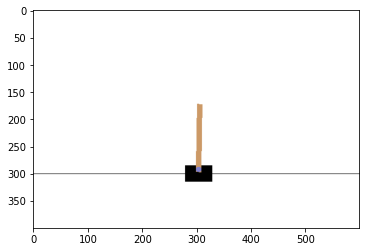

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# if you see "<classname> has no attribute .env", remove .env or update gym
env = gym.make("CartPole-v0").env

env.reset()
n_actions = env.action_space.n
state_dim = env.observation_space.shape[0]

plt.imshow(env.render("rgb_array"))
print("state vector dim =", state_dim)
print("n_actions =", n_actions)

# Neural Network Policy

For this assignment we'll utilize the simplified neural network implementation from __[Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)__. Here's what you'll need:

* `agent.partial_fit(states, actions)` - make a single training pass over the data. Maximize the probability of :actions: from :states:
* `agent.predict_proba(states)` - predict probabilities of all actions, a matrix of shape __[len(states), n_actions]__


In [3]:
from sklearn.neural_network import MLPClassifier

agent = MLPClassifier(
    hidden_layer_sizes=(20, 20),
    activation='tanh',
)

# initialize agent to the dimension of state space and number of actions
agent.partial_fit([env.reset()] * n_actions, range(n_actions), range(n_actions))

MLPClassifier(activation='tanh', hidden_layer_sizes=(20, 20))

In [4]:
def generate_session(env, agent, t_max=1000):
    """
    Play a single game using agent neural network.
    Terminate when game finishes or after :t_max: steps
    """
    states, actions = [], []
    total_reward = 0

    s = env.reset()

    for t in range(t_max):
        
        # use agent to predict a vector of action probabilities for state :s:
        probs = agent.predict_proba([s])[0]
        # print(probs)

        assert probs.shape == (env.action_space.n,), "make sure probabilities are a vector (hint: np.reshape)"
        
        # use the probabilities you predicted to pick an action
        # sample proportionally to the probabilities, don't just take the most likely action
        a = np.random.choice(list(range(len(probs))), p=probs)
        # print(a)
        # ^-- hint: try np.random.choice

        new_s, r, done, info = env.step(a)

        # record sessions like you did before
        states.append(s)
        actions.append(a)
        total_reward += r

        s = new_s
        if done:
            break
    return states, actions, total_reward

In [5]:
dummy_states, dummy_actions, dummy_reward = generate_session(env, agent, t_max=100)
print("states:", np.stack(dummy_states))
print("actions:", dummy_actions)
print("reward:", dummy_reward)

states: [[-1.12916442e-03 -1.34044860e-02 -3.36610158e-02 -1.62374730e-02]
 [-1.39725414e-03 -2.08027933e-01 -3.39857652e-02  2.65637852e-01]
 [-5.55781279e-03 -1.24378141e-02 -2.86730082e-02 -3.75677989e-02]
 [-5.80656908e-03  1.83083326e-01 -2.94243642e-02 -3.39157668e-01]
 [-2.14490255e-03 -1.16078512e-02 -3.62075175e-02 -5.58968289e-02]
 [-2.37705957e-03  1.84014048e-01 -3.73254541e-02 -3.59780040e-01]
 [ 1.30322139e-03  3.79646157e-01 -4.45210549e-02 -6.63994949e-01]
 [ 8.89614453e-03  1.85170903e-01 -5.78009539e-02 -3.85655992e-01]
 [ 1.25995626e-02 -9.08489063e-03 -6.55140737e-02 -1.11742935e-01]
 [ 1.24178648e-02 -2.03209879e-01 -6.77489324e-02  1.59572507e-01]
 [ 8.35366720e-03 -7.18669430e-03 -6.45574823e-02 -1.53690683e-01]
 [ 8.20993332e-03  1.88797366e-01 -6.76312959e-02 -4.66021108e-01]
 [ 1.19858806e-02  3.84806475e-01 -7.69517181e-02 -7.79231065e-01]
 [ 1.96820101e-02  5.80897338e-01 -9.25363394e-02 -1.09509840e+00]
 [ 3.12999569e-02  7.77108134e-01 -1.14438307e-01 -1.4

### CEM steps
Deep CEM uses exactly the same strategy as the regular CEM, so you can copy your function code from previous notebook.

The only difference is that now each observation is not a number but a `float32` vector.

In [6]:
def select_elites(states_batch, actions_batch, rewards_batch, percentile=50):
    """
    Select states and actions from games that have rewards >= percentile
    :param states_batch: list of lists of states, states_batch[session_i][t]
    :param actions_batch: list of lists of actions, actions_batch[session_i][t]
    :param rewards_batch: list of rewards, rewards_batch[session_i]

    :returns: elite_states,elite_actions, both 1D lists of states and respective actions from elite sessions

    Please return elite states and actions in their original order 
    [i.e. sorted by session number and timestep within session]

    If you are confused, see examples below. Please don't assume that states are integers
    (they will become different later).
    """

    percentile_value = np.percentile(rewards_batch, percentile)
    rewards_batch_np = np.array(rewards_batch)
    take = rewards_batch_np > percentile_value
    
    return np.array(states_batch)[take].flatten(), np.array(actions_batch)[take].flatten()

# Training loop
Generate sessions, select N best and fit to those.

In [7]:
from IPython.display import clear_output

def show_progress(rewards_batch, log, percentile, reward_range=[-990, +10]):
    """
    A convenience function that displays training progress. 
    No cool math here, just charts.
    """

    mean_reward = np.mean(rewards_batch)
    threshold = np.percentile(rewards_batch, percentile)
    log.append([mean_reward, threshold])

    clear_output(True)
    print("mean reward = %.3f, threshold=%.3f" % (mean_reward, threshold))
    plt.figure(figsize=[8, 4])
    plt.subplot(1, 2, 1)
    plt.plot(list(zip(*log))[0], label='Mean rewards')
    plt.plot(list(zip(*log))[1], label='Reward thresholds')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.hist(rewards_batch, range=reward_range)
    plt.vlines([np.percentile(rewards_batch, percentile)],
               [0], [100], label="percentile", color='red')
    plt.legend()
    plt.grid()

    plt.show()

mean reward = 198.750, threshold=200.000


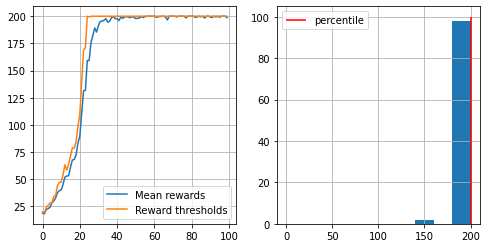

You Win! You may stop training now via KeyboardInterrupt.


In [ ]:
n_sessions = 100
percentile = 70
log = []

for i in range(100):
    # generate new sessions
    sessions = [ generate_session(env, agent, t_max=200) for _ in range(n_sessions) ]

    states_batch, actions_batch, rewards_batch = map(np.array, zip(*sessions))

    elite_states, elite_actions = select_elites(states_batch, actions_batch, rewards_batch, percentile=percentile)

    agent = agent.partial_fit(elite_states, elite_actions)

    show_progress(rewards_batch, log, percentile, reward_range=[0, np.max(rewards_batch)])

    if np.mean(rewards_batch) > 190:
        print("You Win! You may stop training now via KeyboardInterrupt.")

# Results

In [ ]:
# Record sessions

import gym.wrappers

with gym.wrappers.Monitor(gym.make("CartPole-v0"), directory="videos", force=True) as env_monitor:
    sessions = [generate_session(env_monitor, agent) for _ in range(100)]

In [ ]:
# Show video. This may not work in some setups. If it doesn't
# work for you, you can download the videos and view them locally.

from pathlib import Path
from base64 import b64encode
from IPython.display import HTML

video_paths = sorted([s for s in Path('videos').iterdir() if s.suffix == '.mp4'])
video_path = video_paths[-1]  # You can also try other indices

if 'google.colab' in sys.modules:
    # https://stackoverflow.com/a/57378660/1214547
    with video_path.open('rb') as fp:
        mp4 = fp.read()
    data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
else:
    data_url = str(video_path)

HTML("""
<video width="640" height="480" controls>
  <source src="{}" type="video/mp4">
</video>
""".format(data_url))

# Homework part I

### Tabular crossentropy method

You may have noticed that the taxi problem quickly converges from -100 to a near-optimal score and then descends back into -50/-100. This is in part because the environment has some innate randomness. Namely, the starting points of passenger/driver change from episode to episode.

### Tasks
- __1.1__ (2 pts) Find out how the algorithm performance changes if you use a different `percentile` and/or `n_sessions`. Provide here some figures so we can see how the hyperparameters influence the performance.
- __1.2__ (1 pts) Tune the algorithm to end up with positive average score.

It's okay to modify the existing code.


Copied text from seminar

## 1.1

In [8]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make("Taxi-v3")
env.reset()
env.render()

n_states = env.observation_space.n
n_actions = env.action_space.n
print("n states=%i, Lactions=%i" % (n_states, n_actions))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

n states=500, Lactions=6


In [9]:
def initialize_policy(n_states, n_actions):
    return np.full([n_states, n_actions], 1/n_actions)

In [10]:
def generate_session(env, policy, t_max=1000):
    states, actions = [], []
    total_reward = 0

    s = env.reset()

    for t in range(t_max):
        probs = policy[s]
        a = np.random.choice(list(range(len(probs))), p=probs)
        
        
        new_s, r, done, info = env.step(a)

        # record sessions like you did before
        states.append(s)
        actions.append(a)
        total_reward += r

        s = new_s
        if done:
            break
    return states, actions, total_reward

In [11]:

def get_new_policy(elite_states, elite_actions):
    new_policy = np.zeros([n_states, n_actions])
    for s, a in zip(elite_states, elite_actions):
        new_policy [s, a] += 1
    new_policy[new_policy.sum(axis=1) == 0] = 1
    new_policy = new_policy / new_policy.sum(axis=1, keepdims=True)
    return new_policy

In [12]:
from IPython.display import clear_output

def show_progress(rewards_batch, log, percentile, reward_range=[-990, +10]):
    '''    
    A convenience function that displays training progress.
    No cool math here, just charts.
    '''
    mean_reward = np.mean(rewards_batch)
    threshold = np.percentile(rewards_batch, percentile)
    log.append([mean_reward, threshold])

    plt.figure(figsize=[8, 4])
    plt.subplot(1, 2, 1)
    plt.plot(list(zip(*log))[0], label='Mean rewards')
    plt.plot(list(zip(*log))[1], label='Reward thresholds')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.hist(rewards_batch, range=reward_range)
    plt.vlines([np.percentile(rewards_batch, percentile)],
                [0], [100], label="percentile", color='red')
    plt.legend()
    plt.grid()
    clear_output(True)
    print("mean reward = %.3f, threshold=%.3f" % (mean_reward, threshold))
    plt.show()

mean reward = -53.988, threshold=6.000


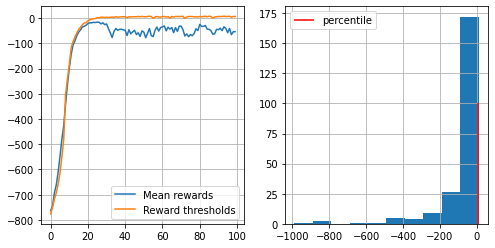

In [ ]:
percentile = 50
n_sessions = 250
learning_rate = 0.5

policy = initialize_policy(n_states, n_actions)

log = []
for i in range(100):
    %time sessions = [generate_session(env, policy, 1000) for _ in range(n_sessions) ]
    states_batch, actions_batch, rewards_batch = zip(*sessions)
    elite_states, elite_actions = select_elites(states_batch, actions_batch, rewards_batch, percentile)

    new_policy = get_new_policy(elite_states, elite_actions)
    policy = learning_rate * new_policy + (1 - learning_rate) * policy
    
    show_progress(rewards_batch, log, percentile)

In [13]:
def show_progress_on_ax(ax, rewards_batch, log, percentile, reward_range=[-990, +100]):
    '''    
    A convenience function that displays training progress.
    No cool math here, just charts.
    '''
    mean_reward = np.mean(rewards_batch)
    threshold = np.percentile(rewards_batch, percentile)
    log.append([mean_reward, threshold])

    ax.clear()
    # plt.figure(figsize=[8, 4])
    # plt.subplot(1, 2, 1)
    ax.plot(list(zip(*log))[0], label='Mean rewards')
    ax.plot(list(zip(*log))[1], label='Reward thresholds')
    ax.legend()
    # ax.show()


def run_taxi_with_parameters(percentile, n_sessions, ax):
    learning_rate = 0.5

    policy = initialize_policy(n_states, n_actions)

    log = []
    for i in range(100):
        # print(i, end=" ")
        sessions = [generate_session(env, policy, 1000) for _ in range(n_sessions) ]
        states_batch, actions_batch, rewards_batch = zip(*sessions)
        elite_states, elite_actions = select_elites(states_batch, actions_batch, rewards_batch, percentile)

        new_policy = get_new_policy(elite_states, elite_actions)
        policy = learning_rate * new_policy + (1 - learning_rate) * policy
        
        show_progress_on_ax(ax, rewards_batch, log, percentile)

        ax.set_title("percentile %i n_sessions %i" % (percentile, n_sessions))

    
def brute_taxi_parameters():
    percentile_ = np.array([30, 40, 50, 60, 70])
    # n_sessions_ = np.array([150, 200, 250, 300, 350])
    fig, axs = plt.subplots(
        1,
        percentile_.size, 
        # n_sessions_.size, 
        figsize=(15, 6), 
        tight_layout=True,

    )
    # plt.show()
    for i in range(percentile_.size):
        # for j in range(n_sessions_.size):
        print(i, end=" ")
        run_taxi_with_parameters(percentile_[i], 250, axs[i])
        # plt.show()
        # fig.show()
    fig.show()

0
0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 1
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 2
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 3
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


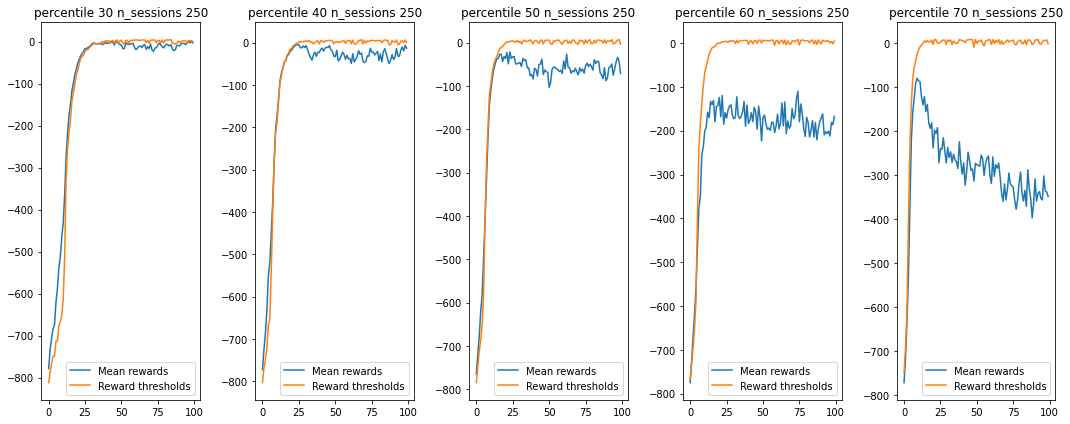

In [ ]:
brute_taxi_parameters()

Видно что чем больше percentile, тем сильнее переобучается модель

Возьмем percentile = 30 потому что он показал наилучший результат

In [14]:
def brute_taxi_parameters():
    # percentile_ = np.array([30, 40, 50, 60, 70])
    n_sessions_ = np.array([50, 100, 200, 400])
    fig, axs = plt.subplots(
        1,
        n_sessions_.size, 
        figsize=(15, 6), 
        tight_layout=True,

    )
    # plt.show()
    for i in range(n_sessions_.size):
        print(i, end=" ")
        run_taxi_with_parameters(30, n_sessions_[i], axs[i])
        # plt.show()
        # fig.show()
    fig.show()

0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


1 2 3 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


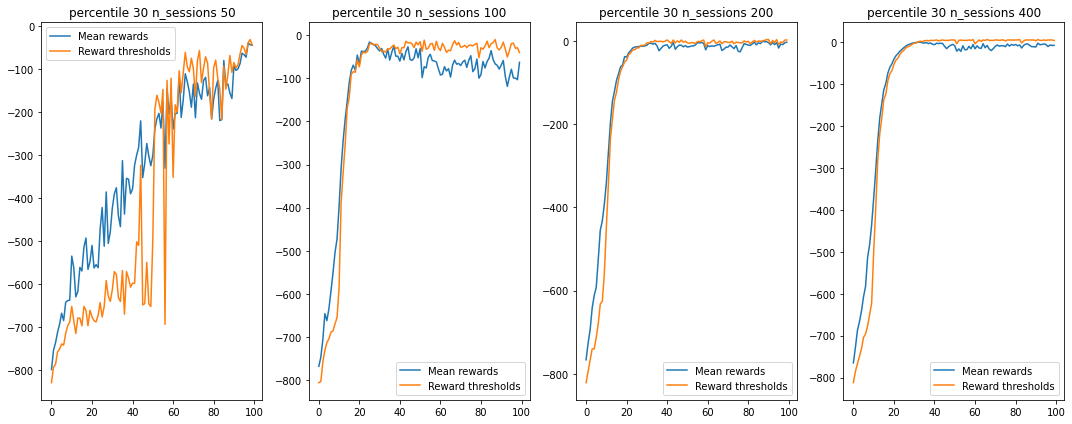

In [ ]:
brute_taxi_parameters()

Маленькое n_sessions плохо сказывается на обучении

Разница между 200 и 400 не такая большая

Лучший результат 

percentile = 30
n_sessions = 200 


## 1.2

In [15]:
def get_new_policy(elite_states, elite_actions):
    new_policy = np.zeros([n_states, n_actions])
    for s, a in zip(elite_states, elite_actions):
        new_policy [s, a] += 1
    new_policy[new_policy.sum(axis=1) == 0] = 1
    new_policy = new_policy / new_policy.sum(axis=1, keepdims=True)
    return new_policy

In [16]:
import copy
import random

def generate_session(env, policy, t_max=1000):
    states, actions = [], []
    total_reward = 0

    s = env.reset()

    for t in range(t_max):
        states.append(s)

        probs = policy[s]
        a = np.random.choice(list(range(len(probs))), p=probs)

        if random.randint(0, 7) > 0:
            new_s, r, done, _ = env.step(a)
            actions.append(a)
        else:

            b = np.random.choice(list(range(len(probs))), p=probs)
            env_a = copy.copy(env)
            env_b = copy.copy(env)
            
            _, r_a, _, _ = env_a.step(a)
            _, r_b, _, _ = env_b.step(b)


            if r_a > r_b:
                new_s, r, done, _ = env.step(a)
                actions.append(a)
            else:
                new_s, r, done, _ = env.step(b)
                actions.append(b)

        # record sessions like you did before
        total_reward += r

        s = new_s
        if done:
            break
    return states, actions, total_reward

mean reward = 2.000, threshold=-3.000


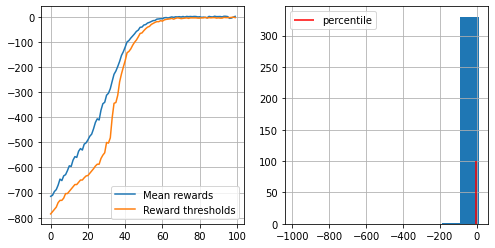

In [ ]:
percentile = 20
n_sessions = 400
# learning_rate = 0.2
learning_rates = np.linspace(0.15, 0.7, 100)

policy = initialize_policy(n_states, n_actions)

log = []
for i in range(100):
    learning_rate = learning_rates[i]
    print(learning_rate)

    %time sessions = [generate_session(env, policy, 1000) for _ in range(n_sessions) ]
    states_batch, actions_batch, rewards_batch = zip(*sessions)
    elite_states, elite_actions = select_elites(states_batch, actions_batch, rewards_batch, percentile)

    new_policy = get_new_policy(elite_states, elite_actions)
    policy = learning_rate * new_policy + (1 - learning_rate) * policy
    
    show_progress(rewards_batch, log, percentile)

Из доработок:


*   n_sessions = 400
*   learning_rate линейно растет с каждой итерацией
*   в generate_session из состояния иногда (с вероятностью 15%) берется не случайные action, а лучший из двух случайных



# Homework part II

### Deep crossentropy method

By this moment, you should have got enough score on [CartPole-v0](https://gym.openai.com/envs/CartPole-v0) to consider it solved (see the link). It's time to try something harder.

* if you have any trouble with CartPole-v0 and feel stuck, feel free to ask us or your peers for help.

### Tasks

* __2.1__ (3 pts) Pick one of environments: `MountainCar-v0` or `LunarLander-v2`.
  * For MountainCar, get average reward of __at least -150__
  * For LunarLander, get average reward of __at least +50__

See the tips section below, it's kinda important.
__Note:__ If your agent is below the target score, you'll still get some of the points depending on the result, so don't be afraid to submit it.
  
  
* __2.2__ (up to 6 pts) Devise a way to speed up training against the default version
  * Obvious improvement: use [`joblib`](https://joblib.readthedocs.io/en/latest/). However, note that you will probably need to spawn a new environment in each of the workers instead of passing it via pickling. (2 pts)
  * Try re-using samples from 3-5 last iterations when computing threshold and training. (2 pts)
  * Obtain __-100__ at `MountainCar-v0` or __+200__ at `LunarLander-v2` (2 pts). Feel free to experiment with hyperparameters, architectures, schedules etc.
  
__Please list what you did in Anytask submission form__. This reduces probability that somebody misses something.
  
  
### Tips
* Gym page: [MountainCar](https://gym.openai.com/envs/MountainCar-v0), [LunarLander](https://gym.openai.com/envs/LunarLander-v2)
* Sessions for MountainCar may last for 10k+ ticks. Make sure ```t_max``` param is at least 10k.
 * Also it may be a good idea to cut rewards via ">" and not ">=". If 90% of your sessions get reward of -10k and 10% are better, than if you use percentile 20% as threshold, R >= threshold __fails to cut off bad sessions__ while R > threshold works alright.
* _issue with gym_: Some versions of gym limit game time by 200 ticks. This will prevent cem training in most cases. Make sure your agent is able to play for the specified __t_max__, and if it isn't, try `env = gym.make("MountainCar-v0").env` or otherwise get rid of TimeLimit wrapper.
* If you use old _swig_ lib for LunarLander-v2, you may get an error. See this [issue](https://github.com/openai/gym/issues/100) for solution.
* If it doesn't train, it's a good idea to plot reward distribution and record sessions: they may give you some clue. If they don't, call course staff :)
* 20-neuron network is probably not enough, feel free to experiment.

You may find the following snippet useful:

## 2.1

state vector dim = 2
n_actions = 3


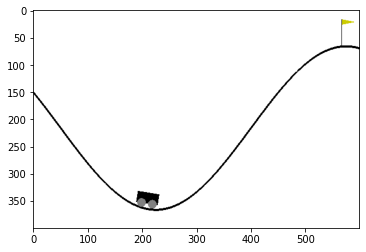

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# if you see "<classname> has no attribute .env", remove .env or update gym
env = gym.make("MountainCar-v0").env

env.reset()
n_actions = env.action_space.n
state_dim = env.observation_space.shape[0]

plt.imshow(env.render("rgb_array"))
print("state vector dim =", state_dim)
print("n_actions =", n_actions)


In [4]:
from sklearn.neural_network import MLPClassifier

def init_agent_mountain_car():
    agent = MLPClassifier(
        hidden_layer_sizes=(20, 20),
        activation='tanh',
    )
    
    agent.partial_fit([env.reset()] * n_actions, range(n_actions), range(n_actions))

    return agent

In [5]:
def generate_session(env, agent, t_max=1000):
    states, actions = [], []
    total_reward = 0

    s = env.reset()

    for t in range(t_max):
        probs = agent.predict_proba([s])[0]
        
        a = np.random.choice(list(range(len(probs))), p=probs)

        new_s, r, done, info = env.step(a)

        states.append(s)
        actions.append(a)
        total_reward += r

        s = new_s
        if done:
            break
    return states, actions, total_reward

In [6]:
def select_elites(states_batch, actions_batch, rewards_batch, percentile=50):
    percentile_value = np.percentile(rewards_batch, percentile)
    # rewards_batch_np = np.array(rewards_batch)
    # take = rewards_batch_np >= percentile_value
    
    # X, y = np.vstack(np.array(states_batch, dtype=object)[take].flatten()), np.array(actions_batch, dtype=object)[take].flatten()
    X, y = [], []
    for i in range(len(rewards_batch)):
        if rewards_batch[i] > percentile_value:
            X.extend(states_batch[i])
            y.extend(actions_batch[i])

    return X, y

In [7]:
from IPython.display import clear_output

def show_progress(rewards_batch, log, percentile, reward_range=[-990, +10]):
    """
    A convenience function that displays training progress. 
    No cool math here, just charts.
    """

    mean_reward = np.mean(rewards_batch)
    threshold = np.percentile(rewards_batch, percentile)
    log.append([mean_reward, threshold])

    clear_output(True)
    print("mean reward = %.3f, threshold=%.3f" % (mean_reward, threshold))
    plt.figure(figsize=[8, 4])
    plt.subplot(1, 2, 1)
    plt.plot(list(zip(*log))[0], label='Mean rewards')
    plt.plot(list(zip(*log))[1], label='Reward thresholds')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.hist(rewards_batch, range=reward_range)
    plt.vlines([np.percentile(rewards_batch, percentile)],
               [0], [100], label="percentile", color='red')
    plt.legend()
    plt.grid()

    plt.show()

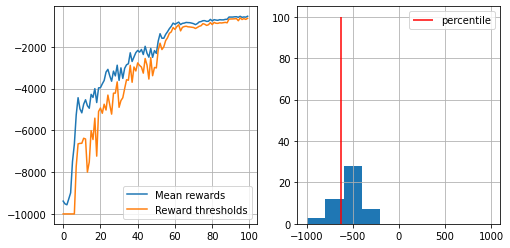

In [ ]:
n_sessions = 50
percentile = 20
log = []

agent_mountain_car = init_agent_mountain_car()

for i in range(100):
    # generate new sessions
    sessions = [ generate_session(env, agent_mountain_car, t_max=10000) for _ in range(n_sessions) ]

    states_batch, actions_batch, rewards_batch = map(np.array, zip(*sessions))

    elite_states, elite_actions = select_elites(states_batch, actions_batch, rewards_batch, percentile=percentile)

    print(len(elite_states), len(elite_actions))

    agent_mountain_car = agent_mountain_car.partial_fit(elite_states, elite_actions)

    show_progress(rewards_batch, log, percentile, reward_range=[-1000, 1000])

mean reward = -120.640, threshold=-129.400


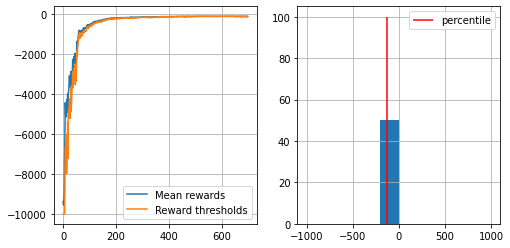

In [ ]:
for i in range(100):
    # generate new sessions
    sessions = [ generate_session(env, agent_mountain_car, t_max=10000) for _ in range(n_sessions) ]

    states_batch, actions_batch, rewards_batch = map(np.array, zip(*sessions))

    elite_states, elite_actions = select_elites(states_batch, actions_batch, rewards_batch, percentile=percentile)

    print(len(elite_states), len(elite_actions))

    agent_mountain_car = agent_mountain_car.partial_fit(elite_states, elite_actions)

    show_progress(rewards_batch, log, percentile, reward_range=[-1000, 1000])

Где-то после 400 итераций без доп улучшений получился mean_reward > -150

In [ ]:
import joblib 

agent_mountain_car = joblib.load("/Users/markysha/Documents/Home/agent_mountain_car.joblib.pkl")

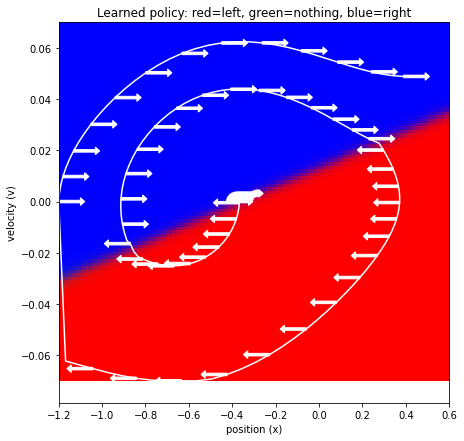

In [ ]:
def visualize_mountain_car(env, agent):
    # Compute policy for all possible x and v (with discretization)
    xs = np.linspace(env.min_position, env.max_position, 100)
    vs = np.linspace(-env.max_speed, env.max_speed, 100)
    
    grid = np.dstack(np.meshgrid(xs, vs[::-1])).transpose(1, 0, 2)
    grid_flat = grid.reshape(len(xs) * len(vs), 2)
    probs = agent.predict_proba(grid_flat).reshape(len(xs), len(vs), 3).transpose(1, 0, 2)

    # # The above code is equivalent to the following:
    # probs = np.empty((len(vs), len(xs), 3))
    # for i, v in enumerate(vs[::-1]):
    #     for j, x in enumerate(xs):
    #         probs[i, j, :] = agent.predict_proba([[x, v]])[0]

    # Draw policy
    f, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(probs, extent=(env.min_position, env.max_position, -env.max_speed, env.max_speed), aspect='auto')
    ax.set_title('Learned policy: red=left, green=nothing, blue=right')
    ax.set_xlabel('position (x)')
    ax.set_ylabel('velocity (v)')
    
    # Sample a trajectory and draw it
    states, actions, _ = generate_session(env, agent)
    states = np.array(states)
    ax.plot(states[:, 0], states[:, 1], color='white')
    
    # Draw every 3rd action from the trajectory
    for (x, v), a in zip(states[::3], actions[::3]):
        if a == 0:
            plt.arrow(x, v, -0.1, 0, color='white', head_length=0.02)
        elif a == 2:
            plt.arrow(x, v, 0.1, 0, color='white', head_length=0.02)

with gym.make('MountainCar-v0').env as env:
    visualize_mountain_car(env, agent_mountain_car)

## 2.2

In [ ]:
import multiprocessing

multiprocessing.cpu_count()

8

In [14]:
from joblib import Parallel, delayed


def generate_session_with_own_enw(agent, name="MountainCar-v0", t_max=10000):
    cur_env = gym.make(name).env
    cur_env.reset()
    return generate_session(cur_env, agent, t_max=t_max)

In [9]:
def init_agent_mountain_car():
    env = gym.make("MountainCar-v0").env

    agent = MLPClassifier(
        hidden_layer_sizes=(16, 16, 16),
        activation='relu',
#         solver="lbfgs",
    )
    
    agent.partial_fit([env.reset()] * n_actions, range(n_actions), range(n_actions))

    return agent

In [10]:
import gym

n_sessions = 50
percentile = 20
log = []

agent_mountain_car = init_agent_mountain_car()

windows_size = 5

window_items = []

In [ ]:

for i in range(500):
    sessions = Parallel(n_jobs=-1)(delayed(generate_session_with_own_enw)() for i in range(n_sessions))
    
    print(len(sessions))
    
    states_batch, actions_batch, rewards_batch = zip(*sessions)
    window_items.append([states_batch, actions_batch, rewards_batch])
    
    while len(window_items) > windows_size:
        window_items.pop(0)
        
    states, actions, rewards = [], [], []
    for i in range(len(window_items)):
        s, a, r = window_items[i]
        states.extend(s)
        actions.extend(a)
        rewards.extend(r)
    
#     states, actions, rewards = [states, actions, rewards]
    elite_states, elite_actions = select_elites(states, actions, rewards, percentile=percentile)
    
    print(len(states), len(actions), len(rewards), len(elite_states), len(elite_actions))

    agent_mountain_car.partial_fit(elite_states, elite_actions)

    show_progress(rewards_batch, log, percentile, reward_range=[-1000, 1000])

Порок -100 преодален

- 1500 итераций
- MLP классификатор с 3 скрытыми слоями вместо 2
- joblib

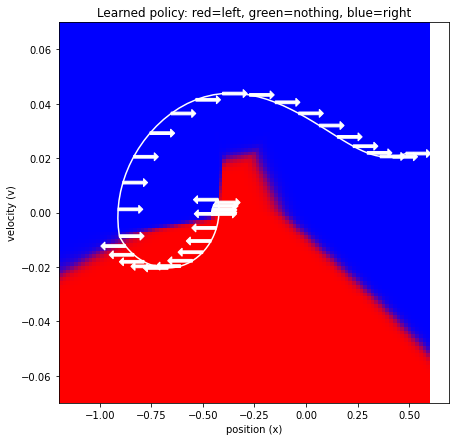

In [ ]:
with gym.make('MountainCar-v0').env as env:
    visualize_mountain_car(env, agent_mountain_car)

### Bonus tasks

* __2.3 bonus__ (2 pts) Try to find a network architecture and training params that solve __both__ environments above (_Points depend on implementation. If you attempted this task, please mention it in Anytask submission._)

* __2.4 bonus__ (4 pts) Solve continuous action space task with `MLPRegressor` or similar.
  * Since your agent only predicts the "expected" action, you will have to add noise to ensure exploration.
  * Choose one of [MountainCarContinuous-v0](https://gym.openai.com/envs/MountainCarContinuous-v0) (90+ pts to solve), [LunarLanderContinuous-v2](https://gym.openai.com/envs/LunarLanderContinuous-v2) (200+ pts to solve) 
  * 4 points for solving. Slightly less for getting some results below solution threshold. Note that discrete and continuous environments may have slightly different rules, aside from action spaces.

In [11]:
!pip3 install Box2D
!pip3 install box2d-py
!pip3 install gym[all]
!pip3 install gym[Box_2D]

  Using cached mujoco-py-1.50.1.68.tar.gz (120 kB)
  ERROR: Failed building wheel for mujoco-py
  Running setup.py clean for mujoco-py
Failed to build mujoco-py
    Running setup.py install for mujoco-py ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-9ryshgu8/mujoco-py_c8cfa47e71274ff591b8e8bb8bd85645/setup.py'"'"'; __file__='"'"'/tmp/pip-install-9ryshgu8/mujoco-py_c8cfa47e71274ff591b8e8bb8bd85645/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-smnmuk5l/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/mujoco-py Check the logs for full command output.


In [12]:
from sklearn.neural_network import MLPRegressor

def init_agent(name="LunarLander-v2"):
    env = gym.make(name).env

    agent = MLPClassifier(
        hidden_layer_sizes=(16, 16, 16),
        activation='relu',
#         solver="lbfgs",
    )
    
    env.reset()
    n_actions = env.action_space.n
    state_dim = env.observation_space.shape[0]

    # n_actions = 1000
    # agent.partial_fit([env.reset()] * n_actions, np.linspace(-1, 1, n_actions))
    agent.partial_fit([env.reset()] * n_actions, range(n_actions), range(n_actions))

    return agent

In [13]:
import gym

n_sessions = 50
percentile = 20
log = []

task = "LunarLander-v2"
task_agent = init_agent(task)

windows_size = 5

window_items = []

In [ ]:
for i in range(500):
    sessions = Parallel(n_jobs=-1)(delayed(generate_session_with_own_enw)(task_agent, task, 1000) for i in range(n_sessions))
    
    states_batch, actions_batch, rewards_batch = zip(*sessions)
    window_items.append([states_batch, actions_batch, rewards_batch])
    
    while len(window_items) > windows_size:
        window_items.pop(0)
        
    states, actions, rewards = [], [], []
    for i in range(len(window_items)):
        s, a, r = window_items[i]
        states.extend(s)
        actions.extend(a)
        rewards.extend(r)
    
    elite_states, elite_actions = select_elites(states, actions, rewards, percentile=percentile)
    
    print(len(states), len(actions), len(rewards), len(elite_states), len(elite_actions))

    task_agent.partial_fit(elite_states, elite_actions)

    show_progress(rewards_batch, log, percentile, reward_range=[-1000, 1000])

mean reward = 43.152, threshold=42.034


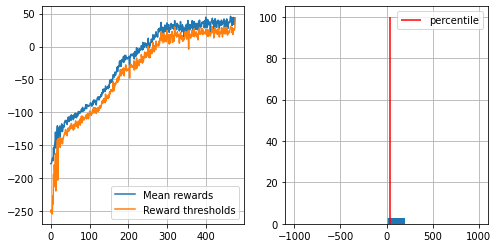

In [30]:
show_progress(rewards_batch, log, percentile, reward_range=[-1000, 1000])

Не изменяя параметры из предыдущего обучения удалось набрать >+40 в пике было ~47 (+50 не набралось)